# MUESTREAR UNA PDF

In [27]:
# Aqui cargamos las liberias a usar

import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math
import random
import seaborn as sns
%matplotlib inline
from scipy import stats

# Encuentra la funcion de distribucion acumulada (CDF) para una distribucion Gaussiana. Escoge un numero aleatorio entre 0 y 1, y usa el CDF para asignar el valor correspondiente de H0. Genera tantos puntos como quieras, y rafica el histograma de H0 para verificar que lo hiciste bien. Usa una media de 70 y un sigma de 2. 

Generamos valores para la funcion acumulada de la Distribucion de Gauss

In [38]:
mu1 = 70
sig1 = 2
h = 0.01

In [39]:
x1 = np.arange(60, 80, h)
a1 = np.empty(len(x1))
a2 = np.empty(len(x1))
y1 = np.empty(len(x1))

La funcion de distribucion acumulada para la distribucion Gaussiana es:

$ F(x) = \frac{1}{2} \left[ 1 + erf \left( \frac{x-\mu}{\sigma \sqrt{2}} \right) \right]$

Evaluamos la funcio:

In [40]:
for i in range(0, len(x1)):
    a1[i] = 0.5 * (1 + math.erf((x1[i] - mu1)/(sig1*math.sqrt(2))))

Graficamos el PDF:

Text(0,0.5,'$F(H_{0})$')

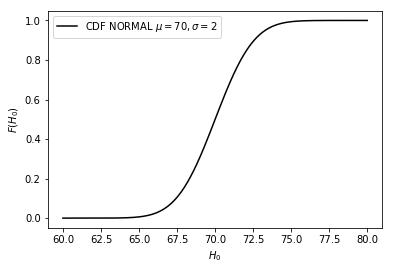

In [41]:
plt.plot(x1,a1, 'black', label="CDF NORMAL $μ = 70, σ = 2$")
plt.legend()
plt.xlabel("$H_{0}$")
plt.ylabel("$F(H_{0})$")

Evaluamos la funcion inversa usando numeros aleatorios entre 0 y 1. Tambien generamos el histograma de H0.

La funcion inversa del CDF es:

$\sigma \sqrt{2}erf^{-1}(2P-1)+\mu$

In [28]:
H=[]
sigm=2
mu=70

for i in range(100000):
    P=random.random() # aleatorio entre 0 y 1
    H.append(sigm*pow(2,0.5)*scipy.special.erfinv(2*P-1)+mu) #funcion inversa de la disribución acumulada.

inter = np.arange(60.0, 80.0, 0.1)

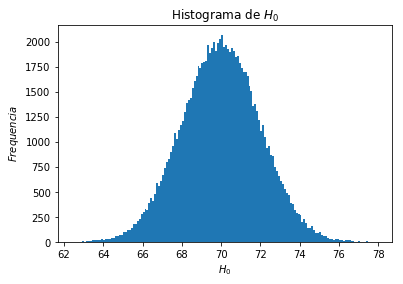

In [31]:
plt.xlim([min(H), max(H)])
plt.hist(H, bins=inter)
plt.title("Histograma de $H_0$")
plt.xlabel("$H_0$") 
plt.ylabel("$Frequencia$")
plt.show()

Trazamos el hitograma normalizado:

/home/luiscantero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


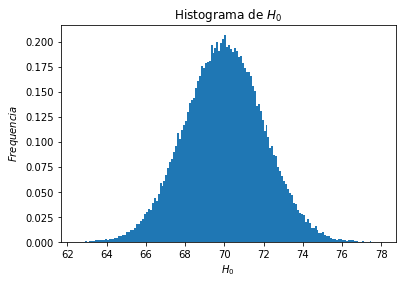

In [33]:
plt.xlim([min(H), max(H)])
plt.hist(H, bins=inter,  normed=1)
plt.title("Histograma de $H_0$")
plt.xlabel("$H_0$") 
plt.ylabel("$Frequencia$")
plt.show()

# DISTRIBUCIONES DE PROBABILIDAD

## Para las distribuciones de Poisson, Distribucion Beta, Binomial y 𝑋2, encontrar el CDF (Cumulative Function Distribution), media, mediana, moda, varianza y desviacion estandar.

## Distribucion normal

La funcion de densidad de la distribucion normal queda definida por: $\frac{1}{σ\sqrt{2π}}e^{-\frac{(x-μ)^2}{2σ^2}}$

Guardamos diferentes valores de media y desviacion estandar (μ y σ):

In [42]:
mu1 = 0
mu2 = -2
sig1 =math.sqrt(5)
sig2 = math.sqrt(0.5)

In [43]:
x13 = np.arange(-5, 5, 0.01)
a13 = np.empty(len(x13))
y13 = np.empty(len(x13))

x14 = np.arange(-5, 5, 0.01)
a14 = np.empty(len(x14))
y14 = np.empty(len(x14))

Evaluamos la funcion de densidad de la distribucion normal y su funcion acumulada:

In [44]:
for i in range(0, len(x13)):
    a13[i] = (1/(sig1*math.sqrt(2*math.pi)))*math.pow(math.e,-1 * math.pow(x13[i]-mu1,2)/(2 * math.pow(sig1,2)))

In [45]:
y13[0] = 0
for j in range(1, len(x13)):
    y13[j] =  (a13[j - 1] + a13[j])/2 *0.01 + y13[j - 1] 

Text(0,0.5,'ACUMULADO')

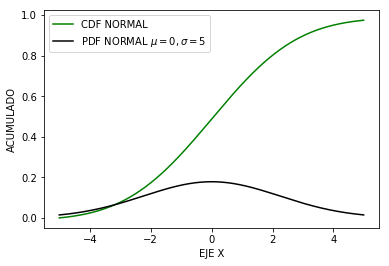

In [46]:
plt.plot(x13,y13, 'green', label="CDF NORMAL")
plt.plot(x13,a13, 'black', label="PDF NORMAL $μ = 0, σ = 5$")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

#### Ahora se utiliza la libreria scipy para crear la grafica de la distribucion y el CDF

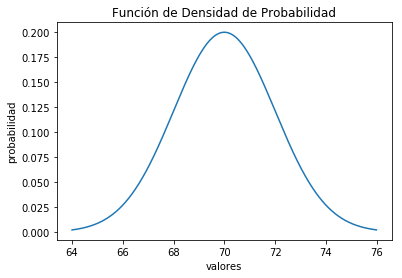

In [18]:
FDP_normal = stats.norm(70, 2).pdf(x13)

plt.plot(x13, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

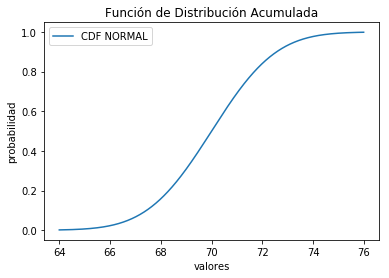

In [25]:
fda_normal = stats.norm(70, 2).cdf(x13) # Función de Distribución Acumulada

plt.plot(x13, fda_normal, label='CDF NORMAL')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend()
plt.show()

## Distribucion de Poisson

La distribucion de probabilidad de Poisson, o probabilidad de que se den x sucesos en un proceso de Poisson con valor promedio λ, vendra dada por:
$p(x;λ)= λ^x / x! * e ^{−λ}$,   donde x =0 ,1,2,...

Guardamos 3 diferentes valores del parametro λ y tres valores diferentes de la variable 'x' para generar 3 graficas diferentes de la funcion de Poisson.

In [50]:
mu1 = 4
mu2 = 25
mu3 = 75

xf = 25
xf2 = 75
xf3 = 120

Para la variable 'x' generamos un arreglo discreto con valores enteros. Tambien generamos un arreglo 'a' que contiene la evaluacion de la funcion de probabilidad de Poisson y un arreglo 'y' que contiene la funcion acumulada de la funcion de probabilidad de Possion de su correspondiente valor de media.

In [51]:
x=np.arange(0, xf, 1)
x2=np.arange(0, xf2, 1)
x3=np.arange(0, xf3, 1)
a1 = np.empty(xf)
y1 = np.empty(xf)
a2 = np.empty(xf2)
y2 = np.empty(xf2)
a3 = np.empty(xf3)
y3 = np.empty(xf3)

Evaluamos la funcion de probabilidad de Poisson y la funcion acumulada.

In [52]:
for i in range(0, xf):
    a1[i] = math.exp(-mu1)*math.pow(mu1,x[i])/math.factorial(x[i])

In [53]:
y1[0] = a1[0]
for j in range(1, xf):
    y1[j] = a1[j] + y1[j-1]

Graficamos el CDF y PDF de la funcion de probabilidad de Possion.

Text(0,0.5,'ACUMULADO')

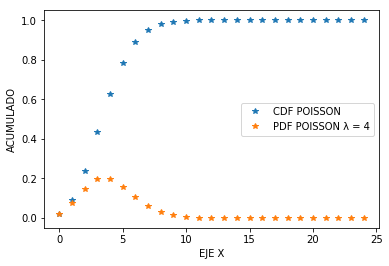

In [55]:
plt.plot(x,y1, "*", label="CDF POISSON")
plt.plot(x,a1, "*", label="PDF POISSON λ = 4")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

- Media

En la distribucion de Poisson, la media coincide con el parametro λ, evaluamos la media con la siguiente expresion: $μ = \sum_{x=0}^{\infty}xp(x;λ)$

In [61]:
xmed1 = np.sum(x*a1)
xmed1

3.9999999999604863

- Mediana

Los limites de la mediana (v) para la distribucion de Possion  son: $λ-Ln(2) ≤ v < λ + 1/3$ 

In [62]:
med11 = mu1 - math.log(2)

In [63]:
med12 = mu1 + 1/3

Limite inferior

In [64]:
med11

3.3068528194400546

Limite superior

In [65]:
med12

4.333333333333333

- Moda

Los limites de la moda (Mo) para la distribucion de Possion  son: $λ - 1  ≤ Mo < λ$ 

In [66]:
mod11 = mu1-1
mod12 = mu1

Limite inferior


In [70]:
mod11

3

Limite superior

In [71]:
mod12

4

- Varianza

La varianza ($σ^{2}$) de la distribucion de Poisson coincide con su valor medio y con el parametro λ que fija la funcion de probabilidad.

In [72]:
var1 = mu1

In [73]:
var1

4

- Desviacion estandar

La desviacion estandar queda entonces como : $σ = \sqrt{λ}$

In [74]:
dest1 = math.sqrt(mu1)

In [75]:
dest1

2.0

Repetimos para otros dos valores del parametro λ:

In [76]:
for i in range(0, xf2):
    a2[i] = math.exp(-mu2)*math.pow(mu2,x2[i])/math.factorial(x2[i])

In [77]:
y2[0] = a2[0]
for j in range(1, xf2):
    y2[j] = a2[j] + y2[j-1]

Text(0,0.5,'ACUMULADO')

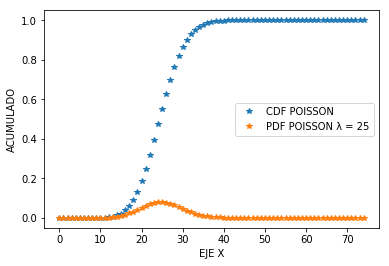

In [78]:
plt.plot(x2,y2, "*", label="CDF POISSON")
plt.plot(x2,a2, "*", label="PDF POISSON λ = 25")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

In [79]:
for i in range(0, xf3):
    a3[i] = math.exp(-mu3)*math.pow(mu3,x3[i])/math.factorial(x3[i])

In [80]:
y3[0] = a3[0]
for j in range(1, xf3):
    y3[j] = a3[j] + y3[j-1]

Text(0,0.5,'ACUMULADO')

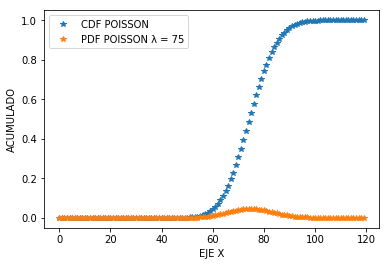

In [81]:
plt.plot(x3,y3, "*", label="CDF POISSON")
plt.plot(x3,a3, "*", label="PDF POISSON λ = 75")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

## Distribucion Binomial